<a href="https://colab.research.google.com/github/jacqueline-chung/AIBusiness/blob/master/FINAL_ITM_703_Course_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Load TensorBoard**

In [ ]:
# Import libraries for building neural networks
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Import for TensorBoard
from tensorboard.plugins.hparams import api as hp
from tensorboard import summary as summary_lib
from keras.callbacks import TensorBoard

# Import for ROC and AUC
from sklearn.metrics import roc_auc_score

# Mount your google drive to your Google Colab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Import for metrics
from keras import backend as K

# Import for Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get the id of your file by right click on it on your google drive 
# Link: https://drive.google.com/open?id=1KuReb5jz_mu0qbzQsJMjjHLMzU2E67lC
downloaded2 = drive.CreateFile({'id':'1KuReb5jz_mu0qbzQsJMjjHLMzU2E67lC'}) 
downloaded2.GetContentFile('heart.csv')  

downloaded = drive.CreateFile({'id':'1KuReb5jz_mu0qbzQsJMjjHLMzU2E67lC'}) 
downloaded.GetContentFile('cd.csv')  

# Use Tensor 2.0
debug = True
_verbose=1 if debug else 0

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load inline
%matplotlib inline

# Load the TensorBoard notebook extension
%load_ext tensorboard

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Exploration

In [ ]:
# Read training dataset
df_train = pd.read_csv('heart.csv')

# *Building Exploration Data* 
Descriptive Data Analysis


Basic Stat Descriptors



In [ ]:
# Describe 'age' feature
df_train['target'] .describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
# Describe 'age' feature
df_train['age'] .describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
 # Describe 'trestbps' feature
 df_train['trestbps'] .describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
 # Describe 'chol' feature
df_train['chol'] .describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [ ]:
 # Describe 'thalach' feature
df_train['thalach'] .describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [ ]:
 # Describe 'oldpeak' feature
df_train['oldpeak'] .describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

Histogram Data Charts

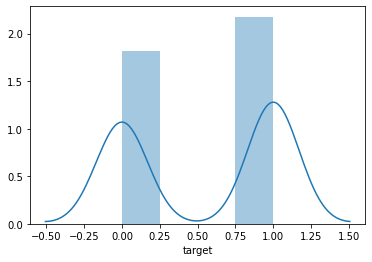

In [ ]:
# Plot histogram of
sns.distplot(df_train['target']);

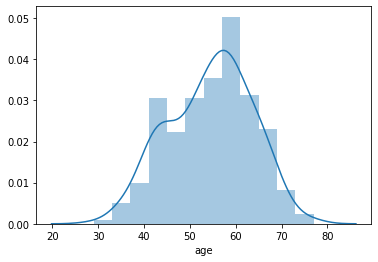

In [ ]:
# Plot histogram of 'age'
sns.distplot(df_train['age']);

Data Analysis: Skewness and Kurtosis (Tailed End) Analysis


In [ ]:
# Find skewness for 'target'
print("Skewness: %f" % df_train['target'].skew())
print("Kurtosis: %f" % df_train['target'].skew())

Skewness: -0.179821
Kurtosis: -0.179821


In [ ]:
# Find skewness for 'age'
print("Skewness: %f" % df_train['age'].skew())
print("Kurtosis: %f" % df_train['age'].skew())

Skewness: -0.202463
Kurtosis: -0.202463


Scatter Plots

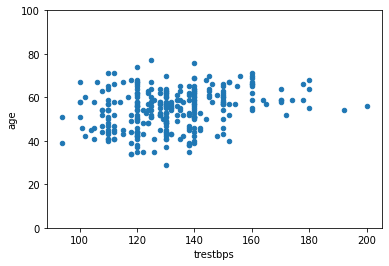

In [ ]:
# Compare the scatterplot between 'target' and 'trestbps'
var = 'trestbps'
data = pd.concat([df_train['age'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='age',ylim=(0,100));

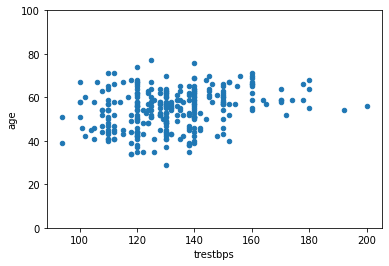

In [ ]:
# Compare the scatterplot between 'target' and 'trestbps'
var = 'trestbps'
data = pd.concat([df_train['age'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='age',ylim=(0,100));

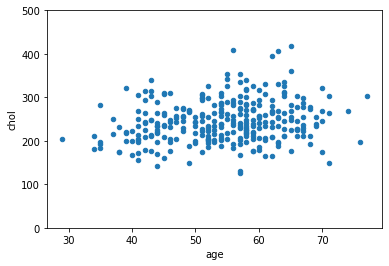

In [ ]:
# Compare the scatterplot between 'target' and 'trestbps'
var = 'age'
data = pd.concat([df_train['chol'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='chol',ylim=(0,500));

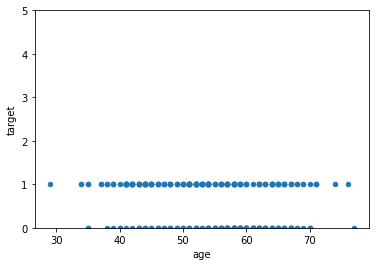

In [ ]:
# Compare the scatterplot between 'age' and 'trestbps'
var = 'age'
data = pd.concat([df_train['target'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='target',ylim=(0,5));

Box Plots Analysis

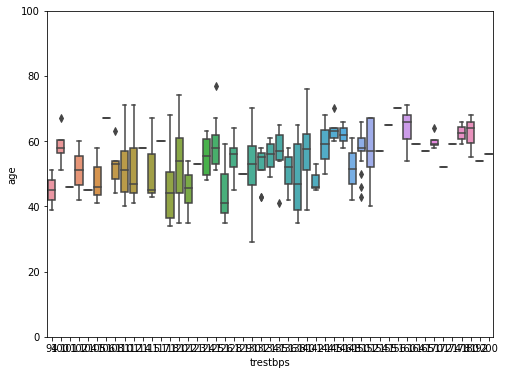

In [ ]:
# Compare the boxplot chart between 'age' and 'trestbps'
var= 'trestbps'
data = pd.concat([df_train['age'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="age", data=data)
fig.axis(ymin=0, ymax=100);

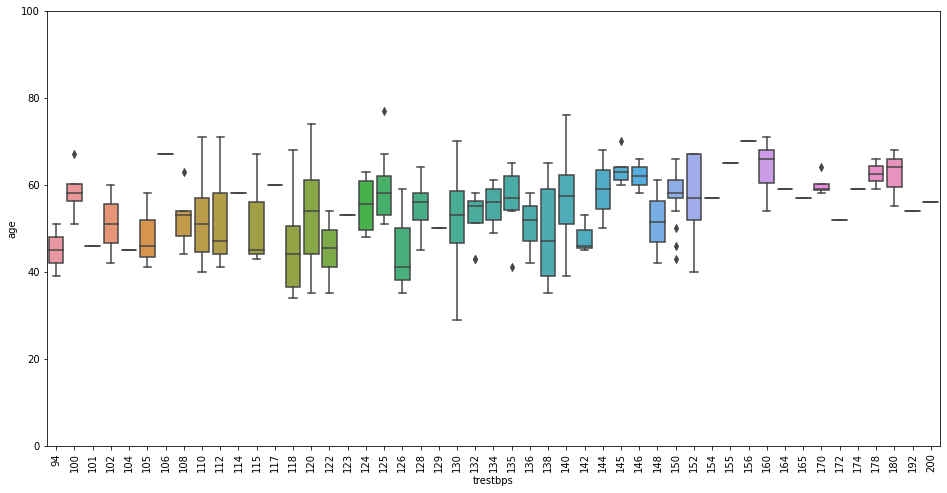

In [ ]:
# Compare the boxplot chart between 'age' and 'trestbps' with min 0 and max 100
var = 'trestbps'
data = pd.concat([df_train['age'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="age", data=data)
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

Heatmap

We defined a function that gets a dataframe as the input and show the calculated correlation between all the features pairwise. For better inference correlations are shown in a heatmap style.

The closer to white the more correlation exist between two variables. As you can see, the diagonal cells has the most correlation. That's because its between a feature and itself, which is fully correlated(!). You can use this plot to identify those features that are more correlated to each other and alter in a similar way. Therefore, you can identify features that do not provide additional information for our model and are just acting as a duplicate for the model due to the fact that they have a very close correlation to another feature. Also, if you are trying to predict a variable, you can check the correlation of that with other features. In this case, features with bigger correlations are better. The reason is correlation between target variable and a feature means those two are more coupled to each other and you can predict with higher confidence by knowing them.

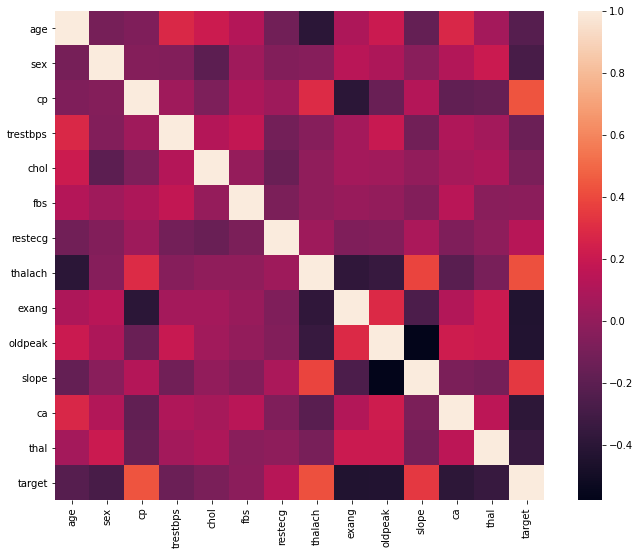

In [ ]:
# Plot heatmap
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

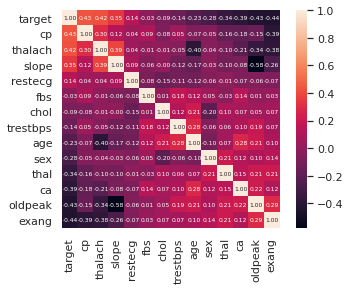

In [ ]:
# Plot the heatmap with all the variables, in correlation with 'target'
k = 16 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

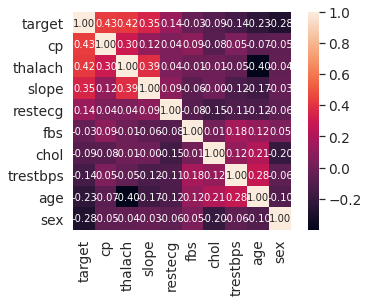

In [ ]:
# Plot the heatmap with the 10 largest variables, in correlation with 'target'
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

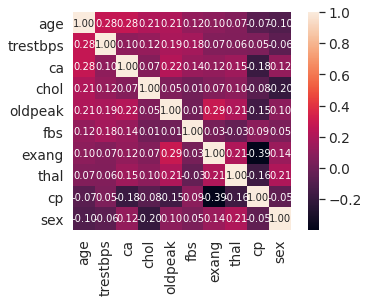

In [ ]:
# Plot the heatmap with the 10 largest variables, in correlation with 'age'
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

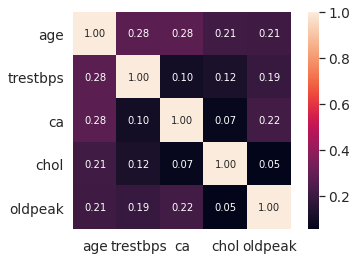

In [ ]:
# Plot the heatmap with the 10 largest variables, in correlation with 'age'
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# We use this to compare scatter plots and probability charts

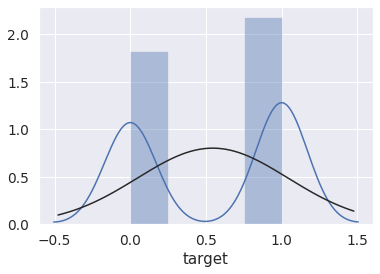

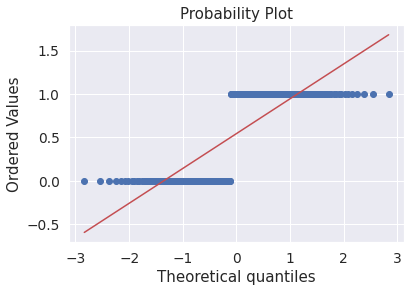

In [ ]:
# Plot probability chart for 'target'
sns.distplot(df_train['target'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['target'], plot=plt)

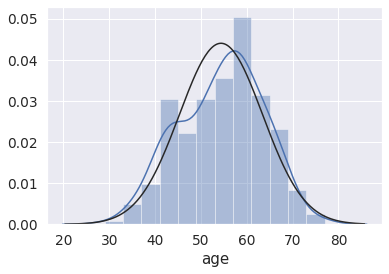

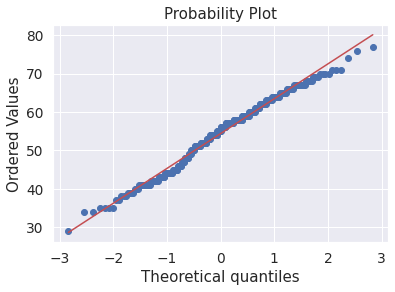

In [ ]:
# Plot probability chart for 'age'
sns.distplot(df_train['age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['age'], plot=plt)

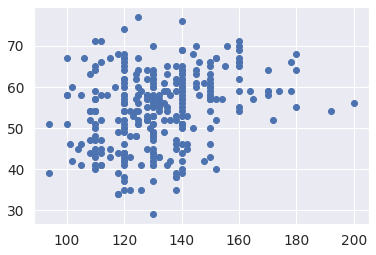

In [ ]:
# Compare the scatterplot between 'age' and 'trestbps'
plt.scatter(df_train['trestbps'], df_train['age']);

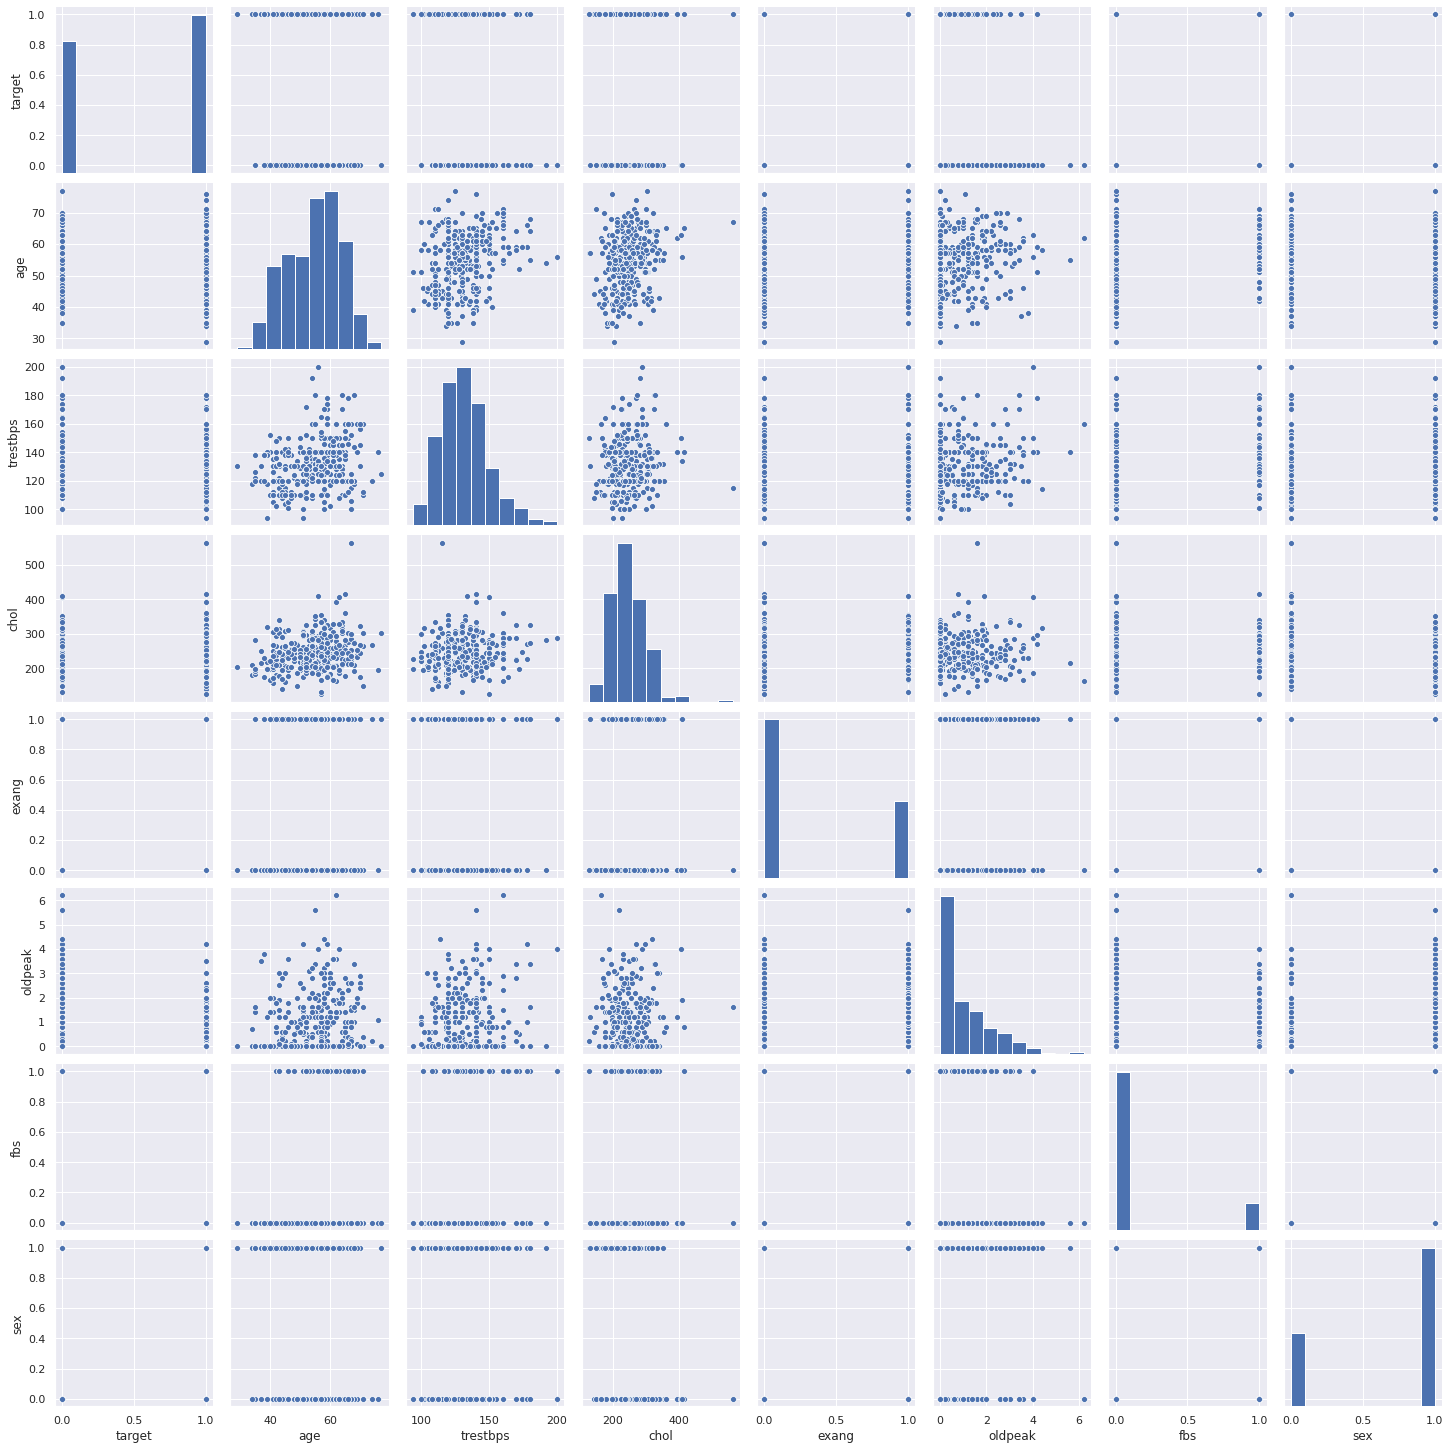

In [ ]:
# Plot create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column
# Show a subset of variables on rows and columns
sns.set()
cols = ['target','age', 'trestbps', 'chol', 'exang', 'oldpeak', 'fbs', 'sex']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Read Dataset

In [ ]:
# read the dataset "heart.csv" as a Google Drive file
data = pd.read_csv('heart.csv')

Check the shape of the dataset

In [ ]:
# Print the dimensions of the dataframe (number of rows and columns)
print(data.shape)

# Returns top 5 rows on the dataframe
print(data.head())

# **Split Training and Test Data**


*  Split the data randomly, where training data is 70% and test data is 30%
* Print the data that was split between training and test

Please refer to the followin link for more infomation about using loc function,
https://www.w3resource.com/pandas/series/series-loc.php
on this link you can find a section to use a bolean values to select the rows


In [ ]:
# The following code generates a list with same length as our data, and randomly assigns true or false to them 
split = 0.7
# Compare with split because if loading msk, you will get T or F -> subset dataframes
msk = np.random.rand(len(data)) < split

# Shuffle the entire data set (applies to both train & test)
#  Sample method return a random sample of data , and by setting fraction to 1, we'll get the whole data in a shuffled way
data = data.sample(frac=1).reset_index(drop=True)

# Using panadas loc function to subset our list
# Training Data
train_labels = data.loc[msk, data.columns =='target']
train_data  = data.loc[msk, data.columns !='target']
# Testing Data
test_labels = data.loc[~msk, data.columns =='target']
test_data  = data.loc[~msk, data.columns !='target']

In [ ]:
# Look at first rows of data to check training and test data
print('Test Data:', test_data.head(1))
print('Test Target Class:', test_labels.head(1))
print('Training Data:', train_data.head(1))
print('Training Target Class:', train_labels.head(1))

 # Random numbers that are generated (based on # of rows in dataset)
print(msk[0:5])
# Check shape of each dataset
print(train_data.shape)
print(test_data.shape)
# Check the number of values in total
print(test_data.shape[0]+train_data.shape[0])

# **Normalization**
The numerical values stay between [RANGE]

In [ ]:
# Normalizing our data: setting the axis to 0 means that the mean and std 
#  should calculated towards rows not columns
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
# Check training and test data after normalization
print(train_data.head(1))
print(test_data.head(1))

# **Initial Hyperparameters**

In [ ]:
'''
# We create the parameters that we would like to try different values for.
# we use the HParam method to parametrize our model so we investigate the effect of different parameters. 

# Adjust # of neurons in input (first) layer
HP_INPUT = hp.HParam('input', hp.Discrete([4,16,24]))

# Adjust # of neurons in the hidden (second) layer 
HP_HIDDEN1 = hp.HParam('hidden 1', hp.Discrete([4,8])) 

# Use different optimizer to see which one gives better accuracy
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

# Use the most common activation functions
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['relu','sigmoid']))

# Use 5 epochs for now
HP_EPOCH = hp.HParam('epoch', hp.Discrete([5]))

# Use common loss function
HP_LOSS = hp.HParam('loss', hp.Discrete(['sparse_categorical_crossentropy']))

# Our goal is to find the values for the above paramters that gives the best accuracy on the test data
ACCURACY_METRIC = 'accuracy'
'''

# **Final Hyperparameters**

In [ ]:
# This shows us the best hyperparameters for the neural network classifiers

# We create the parameters that we would like to try different values for.
# We use the HParam method to parametrize our model so we investigate the effect of different parameters. 

# Adjust # of neurons in input (first) layer
HP_INPUT = hp.HParam('input', hp.Discrete([500,750,1000]))

# Adjust # of neurons in the first hidden (second) layer 
HP_HIDDEN1  = hp.HParam('hidden 1', hp.Discrete([8,16,50]))

# Adjust # of neurons in the second hidden (third) layer 
HP_HIDDEN2 = hp.HParam('hidden 2', hp.Discrete([8,16,50]))

# Use different optimizer to see which one gives better accuracy
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam','sgd']))

# Use Activation function called Tanh and ReLU
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['tanh', 'relu']))

# Use 5 and 10 epochs
HP_EPOCH = hp.HParam('epoch', hp.Discrete([5,10]))

# Use common loss function: Binary Cross-Entropy, Hinge, Squared Hinge
HP_LOSS = hp.HParam('loss', hp.Discrete(['binary_crossentropy','hinge','squared_hinge']))

# Declare 'accuracy' variable
ACC_METRIC = 'accuracy'

# Our goal is to find the values for the above paramters that gives the best performance on the test data

# **Metrics**
Create functions for Recall, Precision, F1 Score to measure performance for models.

The 3 following metrics, in addition to classification accuracy, that are commonly required for a neural network model on a binary classification problem are:

* Precision
* Recall
* F1 Score

We will calculate these three metrics, as well as classification accuracy using the scikit-learn metrics API, as well as loss.

Links:
* https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

In [ ]:
# Define recall_m using training and test labels 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Define precision_m using training and test labels 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Define f1_m using training and test labels 
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **Neural Network Classifier**


## Initial

In [ ]:
'''
# Build model with hyperparameters and activation functions
def build_model(hparams):
  model = keras.Sequential([
    keras.layers.Dense(hparams[HP_INPUT], hparams[HP_ACTIVATION],  # put our parameter (replace parameter with # of parameter)
                       input_shape=(train_data.shape[1],)), # Input Layer
    keras.layers.Dense(hparams[HP_HIDDEN1], hparams[HP_ACTIVATION]), # Hidden Layer
    keras.layers.Dense(2, hparams[HP_ACTIVATION]) # Output Layer
])
  
  # Compiling model; Calculate Accuracy; Optimizer optimizes loss function 
  model.compile(hparams[HP_OPTIMIZER],hparams[HP_LOSS],ACCURACY_METRIC)

# Fit and train model and save metrics in history
  model.fit(train_data, train_labels, hparams[HP_EPOCH], 
            validation_split = 0.2, verbose = 1,
            validation_data=(test_data, test_labels))
  
  _, accuracy = model.evaluate(test_data, test_labels)
  return accuracy # Output model

'''

## 2 Hidden Layers

In [ ]:
# Build model with hyperparameters and activation functions
def build_model(hparams):
  model = keras.Sequential([
    keras.layers.Dense(hparams[HP_INPUT], hparams[HP_ACTIVATION],  # put our parameter (replace parameter with # of parameter)
                       input_shape=(train_data.shape[1],)), # Input Layer
    keras.layers.Dense(hparams[HP_HIDDEN1], hparams[HP_ACTIVATION]), # Hidden Layer
    keras.layers.Dense(hparams[HP_HIDDEN2], hparams[HP_ACTIVATION]), # Hidden Layer
    #keras.layers.Dense(hparams[HP_HIDDEN3], hparams[HP_ACTIVATION]), # Hidden Layer
    keras.layers.Dense(2, hparams[HP_ACTIVATION]) # Output Layer
])
  
  # Compiling model by calculating accuracy, recall, precision, and F1 score
  # Use Optimizer optimizes loss function 
  model.compile(hparams[HP_OPTIMIZER],hparams[HP_LOSS],metrics=[recall_m, precision_m, f1_m, ACC_METRIC])

# Fit and train model and save metrics in history
  model.fit(train_data, train_labels, hparams[HP_EPOCH], 
            validation_split = 0.2, verbose = 1)
  
  # Evaluate the model using test data
  loss = model.evaluate(test_data, test_labels)
  _,recall, precision, f1, accuracy = model.evaluate(test_data, test_labels)

  # Get loss, recall, precision, F1 score, and accuracy after evaluating model against test data
  return loss[0], recall, precision, f1, accuracy # Output model

# **Plot Accuracy and Loss**
* Accuracy 
* Running Time (Epoch)
* Precision
* Recall
* F1 Score
* Loss

In [ ]:
# With statement by adding the hyperparameters in the summary
with tf.summary.create_file_writer('./hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_INPUT,HP_HIDDEN1, HP_HIDDEN2,  HP_OPTIMIZER, HP_ACTIVATION, HP_EPOCH, HP_LOSS],
    metrics=[hp.Metric('loss', display_name='loss'),
             hp.Metric('recall', display_name='recall'),
             hp.Metric('precision', display_name='precision'),
             hp.Metric('f1', display_name='f1_score'),
             hp.Metric(ACC_METRIC, display_name='accuracy')]
  )

## **Run Models with Hyparam**

In [ ]:
# This function will execute the model builing method with different set of paratemer and log the results to the folder.
# With statement helps you to keep your log file open while executing the commands in the with block
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # Record the values used in this trial
    loss, recall, precision, f1, accuracy = build_model(hparams)
    tf.summary.scalar('loss', loss, step=1)
    tf.summary.scalar('recall', recall, step=1) # Scalar: a data class; different value
    tf.summary.scalar('precision', precision, step=1) # Scalar: a data class; different value
    tf.summary.scalar('f1', f1, step=1)
    tf.summary.scalar(ACC_METRIC, accuracy, step=1)

In [ ]:
# Run our model by using hyperparameters that defined earlier
# Combined all of them in for loops to run the different combinations of parameters
session_num = 0

for input1 in HP_INPUT.domain.values:
  for hidden1 in HP_HIDDEN1.domain.values:
      for hidden2 in HP_HIDDEN2.domain.values:
            for optimizer in HP_OPTIMIZER.domain.values:
                for activation in HP_ACTIVATION.domain.values:
                    for epoch in HP_EPOCH.domain.values:
                        for loss in HP_LOSS.domain.values:         
                                hparams = {
                                    HP_INPUT: input1,
                                    HP_HIDDEN1: hidden1,
                                    HP_OPTIMIZER: optimizer,
                                    HP_ACTIVATION: activation,
                                    HP_EPOCH: epoch,
                                    HP_LOSS: loss,
                                    HP_HIDDEN2: hidden2,                                   
                                }
                                # Run the hyperparameters 
                                run_name = "run-%d" % session_num 
                                print('--- Starting trial: %s' % run_name) 
                                print({h.name: hparams[h] for h in hparams}) 
                                run('./hparam_tuning/' + run_name, hparams)
                                session_num += 1 # Add session_num

# **Testing & Experiemental Results**
Use TensorBoard


In [ ]:
# Loads an inplace TensorBoard to investigate the performance of  runs
# This can sort performance
# It allows you to compare the various hyperparameters
%tensorboard --logdir ./hparam_tuning

Kill TensoBoard if you want to reset the TensorBoard and change the hyperparameters: !kill {PID}